# Property Price Prediction
Build a linear regression model to predict the price of the property from the dataset having attributes such as sale type, sale condition etc

## Data Description
Building_Class: Identifies the type of dwelling involved in the sale.	

Zoning_Class: Identifies the general zoning classification of the sale.
	
Lot_Extent: Linear feet of street connected to property

Lot_Size: Lot size in square feet

Road_Type: Type of road access to property
       	
Lane_Type: Type of alley access to property
		
Property_Shape: General shape of property

Land_Outline: Flatness of the property

Utility_Type: Type of utilities available
		
Lot configuration: Lot configuration
	
Property_Slope: Slope of property
			
Neighborhood: Physical locations within Ames city limits
		
Condition1: Proximity to various conditions
	
Condition2: Proximity to various conditions (if more than one is present)
	
House_Type: Type of dwelling
			
House_Design: Style of dwelling
	
Overall_Material: Rates the overall material and finish of the house
	
House_Condition: Rates the overall condition of the house
		
Construction_Year: Original construction date

Remodel_Year: Remodel date (same as construction date if no remodeling or additions)

Roof_Design: Type of roof
		
Roof_Quality: Roof material
		
Exterior1st: Exterior covering on house
	
Exterior2nd: Exterior covering on house (if more than one material)
	
Brick_Veneer_Type: Masonry veneer type
	
Brick_Veneer_Area: Masonry veneer area in square feet

Exterior_Material: Evaluates the quality of the material on the exterior 
		
Exterior_Condition: Evaluates the present condition of the material on the exterior

Foundation_Type: Type of foundation
		
Basement_Height: Evaluates the height of the basement
		
Basement_Condition: Evaluates the general condition of the basement
	
Exposure_Level: Refers to walkout or garden level walls
	
BsmtFinType1: Rating of basement finished area
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

Total_Basement_Area: Total square feet of basement area

Heating_Type: Type of heating
		
Heating_Quality: Heating quality and condition
		
Air_Conditioning: Central air conditioning
		
Electrical_System: Electrical system
		
First_Floor_Area: First Floor square feet
 
Second_Floor_Area: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

Grade_Living_Area: Above grade (ground) living area square feet

Underground_Full_Bathroom: Basement full bathrooms

Underground_Half_Bathroom: Basement half bathrooms

Full_Bathroom_Above_Grade: Full bathrooms above grade

Half_Bathroom_Above_Grade: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

Kitchen_Quality: Kitchen quality
       	
Rooms_Above_Grade: Total rooms above grade (does not include bathrooms)

Functional_Rate: Home functionality (Assume typical unless deductions are warranted)
		
Fireplaces: Number of fireplaces

Fireplace_Quality: quality of fireplaces
		
Garage: Garage location
		
Garage_Built_Year: Year garage was built
		
Garage_Finish_Year: Interior finish of the garage
	
Garage_Size: Size of garage in car capacity

Garage_Area: Size of garage in square feet

Garage_Qualit: Garage quality
		
Garage_Condition: Garage condition
	
Pavedd_Drive: Paved driveway
		
W_Deck_Area: Wood deck area in square feet

Open_Lobby_Area: Open porch area in square feet

Enclosed_Lobby_Area: Enclosed porch area in square feet

Three_Season_Lobby_Area: Three season porch area in square feet

Screen_Lobby_Area: Screen porch area in square feet

Pool_Area: Pool area in square feet

Pool_Quality: Pool quality	

Fence_Quality: quality of fence

Miscellaneous_Feature: Miscellaneous feature not covered in other categories

Miscellaneous_Value: $Value of miscellaneous feature

Month_Sold: Month Sold (MM)

Year_Sold: Year Sold (YYYY)

Sale_Type: Type of sale

Sale_Condition: Condition of sale

### Import required libraries

In [1]:
import os as os

In [2]:
os.chdir("C:\\Users\\kunal\\OneDrive\\Desktop\\Linear_Regression_Python")

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Boston_Jan_2022_Kunal.ipynb',
 'Categorical vars.png',
 'Cat_Corr_heatmap.png',
 'chapter9_Carnegie_Melon_University.pdf',
 'Corr_heatmap.png',
 'Delhi_hom_price.csv',
 'Flats_Price_SGD.csv',
 'lecture3_MIT.pdf',
 'Linear Regression with SGD- March 2021_March-Copy2.ipynb',
 'Linear Regression with SGD- March 2021_March.ipynb',
 'Linear Regression with SGD- Updated March 2022.ipynb',
 'Linear Regression with Stochastic Gradient Descent org.ipynb',
 'Linear Regression with Stochastic Gradient Descent_org.ipynb',
 'Linear Regression.pptx',
 'Linear_Regression_May_2021_Kunal.ipynb',
 'Linear_Regression_Property Price Prediction _April_2022-Copy1.ipynb',
 'Linear_Regression_Property Price Prediction _April_2022-Final.ipynb',
 'Linear_Regression_Property Price Prediction _April_2022.ipynb',
 'Mar_30_2022 Linear regression.ipynb',
 'MCQs on Linear Regression.docx',
 'missing data.png',
 'PCA_Property_price_dataset_April_2022.ipynb',
 'Problem Statement.docx',
 'Proper

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Load the data
We import the package as pd and use the read_csv() function to load the train and test data

In [5]:
train = pd.read_csv("Property_Price_Train.csv")
test = pd.read_csv("Property_Price_Test.csv")

In [6]:
train_drop=train[['Id','Year_Sold','Month_Sold']];train_drop

,Id,Year_Sold,Month_Sold
0,1,2008,2
1,2,2007,5
2,3,2008,9
3,4,2006,2
4,5,2008,12
...,...,...,...
1454,1455,2009,10
1455,1456,2007,8
1456,1457,2010,2
1457,1458,2010,5


In [7]:
test_drop=test[['Id','Year_Sold','Month_Sold']]

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Remove Id and Sale_Price column from the train dataset
train = train.drop(['Id','Year_Sold','Month_Sold'], axis=1)

# Remove Id and Sale_Price column from the test dataset
test = test.drop(['Id','Year_Sold','Month_Sold'], axis=1)

In [10]:
test.shape

(1459, 77)

In [11]:
alldata = train.append(test)

In [12]:
alldata = alldata.reset_index()

In [13]:
alldata.head()

,index,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price
0,0,60,RLD,65.0,8450.0,Paved,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500.0
1,1,20,RLD,80.0,9600.0,Paved,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500.0
2,2,60,RLD,68.0,11250.0,Paved,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500.0
3,3,70,RLD,60.0,9550.0,Paved,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000.0
4,4,60,RLD,84.0,14260.0,Paved,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000.0


### Dimensions of dataset

In [14]:
alldata.shape

(2918, 79)

### Checking datatypes

In [15]:
# check the datatype of variables
alldata.dtypes

index                      int64
Building_Class             int64
Zoning_Class              object
Lot_Extent               float64
Lot_Size                 float64
                          ...   
Miscellaneous_Feature     object
Miscellaneous_Value        int64
Sale_Type                 object
Sale_Condition            object
Sale_Price               float64
Length: 79, dtype: object

### Summary Statistics
Here we take a look at the summary of each attribute

In [16]:
# Basic description of data
# We can use the describe() function to get summary statistics
alldata.describe()

,index,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Price
count,2918.00000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2895.000000,2917.000000,...,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,1459.000000
mean,729.00000,57.150446,69.303454,10194.634957,6.089445,5.564428,1971.314942,1984.271076,102.236615,441.290024,...,1.766884,471.851510,93.095222,48.062908,24.411772,2.603153,16.067855,2.252570,50.843386,180944.102810
std,421.24911,42.519354,23.349420,7888.702911,1.410045,1.113292,30.296408,20.894880,179.355169,455.632103,...,0.761623,213.846684,126.257764,68.167925,64.346881,25.192440,56.193208,35.670034,567.498680,79464.918335
min,0.00000,20.000000,21.000000,-4265.104479,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,364.25000,20.000000,59.000000,7134.500000,5.000000,5.000000,1953.250000,1965.000000,0.000000,0.000000,...,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129950.000000
50%,729.00000,50.000000,68.000000,9600.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,2.000000,477.000000,75.123594,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1093.75000,70.000000,80.000000,12342.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,2.000000,593.481992,173.183207,86.733331,50.325034,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1458.00000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,755000.000000


Summary of statistics pertaining to the DataFrame columns. This function gives the mean, std, minimum value, maximum value and IQR values and given summary about numeric columns

In [17]:
alldata['Sale_Price'].describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

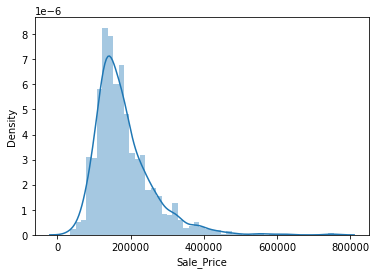

In [18]:
import seaborn as sns

sns.distplot(alldata['Sale_Price'])

plt.show()

### Examine the numerical and categorical features in the dataset

In [19]:
df_numeric_features = alldata.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['index', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Sale_Price'],
      dtype='object')

In [20]:
df_categorical_features = alldata.select_dtypes(include=[np.object])

df_categorical_features.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

### Missing Values Analysis
Most libraries will give you an error if you try to build a model using data with missing values Python libraries represent missing numbers as nan which is short for "not a number". You can detect which cells have missing values, and then count how many there are in each column with the command

In [21]:
# check for missing values
missing = alldata.isnull().sum()
missing

index                       0
Building_Class              0
Zoning_Class                4
Lot_Extent                486
Lot_Size                    0
                         ... 
Miscellaneous_Feature    2813
Miscellaneous_Value         0
Sale_Type                   1
Sale_Condition              0
Sale_Price               1459
Length: 79, dtype: int64

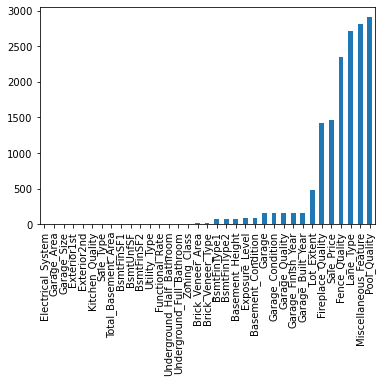

In [22]:
# check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]
# we can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()

plt.show()

There are 35 attributes have missing values

### Missing value treatment for numerical features

In [23]:
# fill na with median
alldata.fillna(alldata.median(), inplace=True)

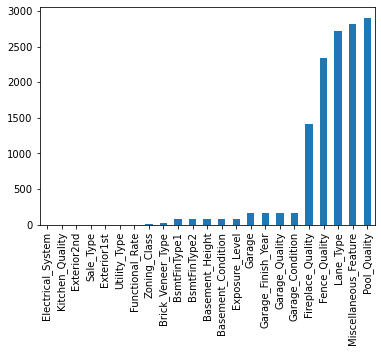

In [24]:
# Again check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]
# we can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

We can only replace missing values by mean whose data type is numeric.
For a few columns there is lots of NaN entries.
However, reading the data description we find this is not missing data:
For Pool_Quality, NaN is not missing data but means no pool, likewise for Fence_Quality, Fireplace_Quality etc.

### Missing value treatment for categorical features

In [26]:
# Replace nan with None in these columns
cols_fillna = ['Pool_Quality','Miscellaneous_Feature','Lane_Type','Fence_Quality','Brick_Veneer_Type','Fireplace_Quality',
               'Garage_Quality','Garage_Condition', 'Electrical_System','Garage_Finish_Year', 
               'Exposure_Level','Basement_Condition','Basement_Height','BsmtFinType1','BsmtFinType2','Garage','Zoning_Class','Functional_Rate',
               'Utility_Type','Exterior1st','Sale_Type','Exterior2nd','Kitchen_Quality','Electrical_System']
for col in cols_fillna:
    alldata[col].fillna('None',inplace=True)

In [27]:
# Again check for missing values
alldata.isnull().sum()

index                    0
Building_Class           0
Zoning_Class             0
Lot_Extent               0
Lot_Size                 0
                        ..
Miscellaneous_Feature    0
Miscellaneous_Value      0
Sale_Type                0
Sale_Condition           0
Sale_Price               0
Length: 79, dtype: int64

### Examine the numerical and categorical features in the dataset after missing value treatment

In [28]:
df_numeric_features = alldata.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['index', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Sale_Price'],
      dtype='object')

In [29]:
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      2918 non-null   int64  
 1   Building_Class             2918 non-null   int64  
 2   Lot_Extent                 2918 non-null   float64
 3   Lot_Size                   2918 non-null   float64
 4   Overall_Material           2918 non-null   int64  
 5   House_Condition            2918 non-null   int64  
 6   Construction_Year          2918 non-null   int64  
 7   Remodel_Year               2918 non-null   int64  
 8   Brick_Veneer_Area          2918 non-null   float64
 9   BsmtFinSF1                 2918 non-null   float64
 10  BsmtFinSF2                 2918 non-null   float64
 11  BsmtUnfSF                  2918 non-null   float64
 12  Total_Basement_Area        2918 non-null   float64
 13  First_Floor_Area           2918 non-null   int64

In [30]:
df_numeric_features.shape

(2918, 36)

In [31]:
#df_numeric_features.info()

In [32]:
#df_numeric_features.head()

In [33]:
import seaborn as sns

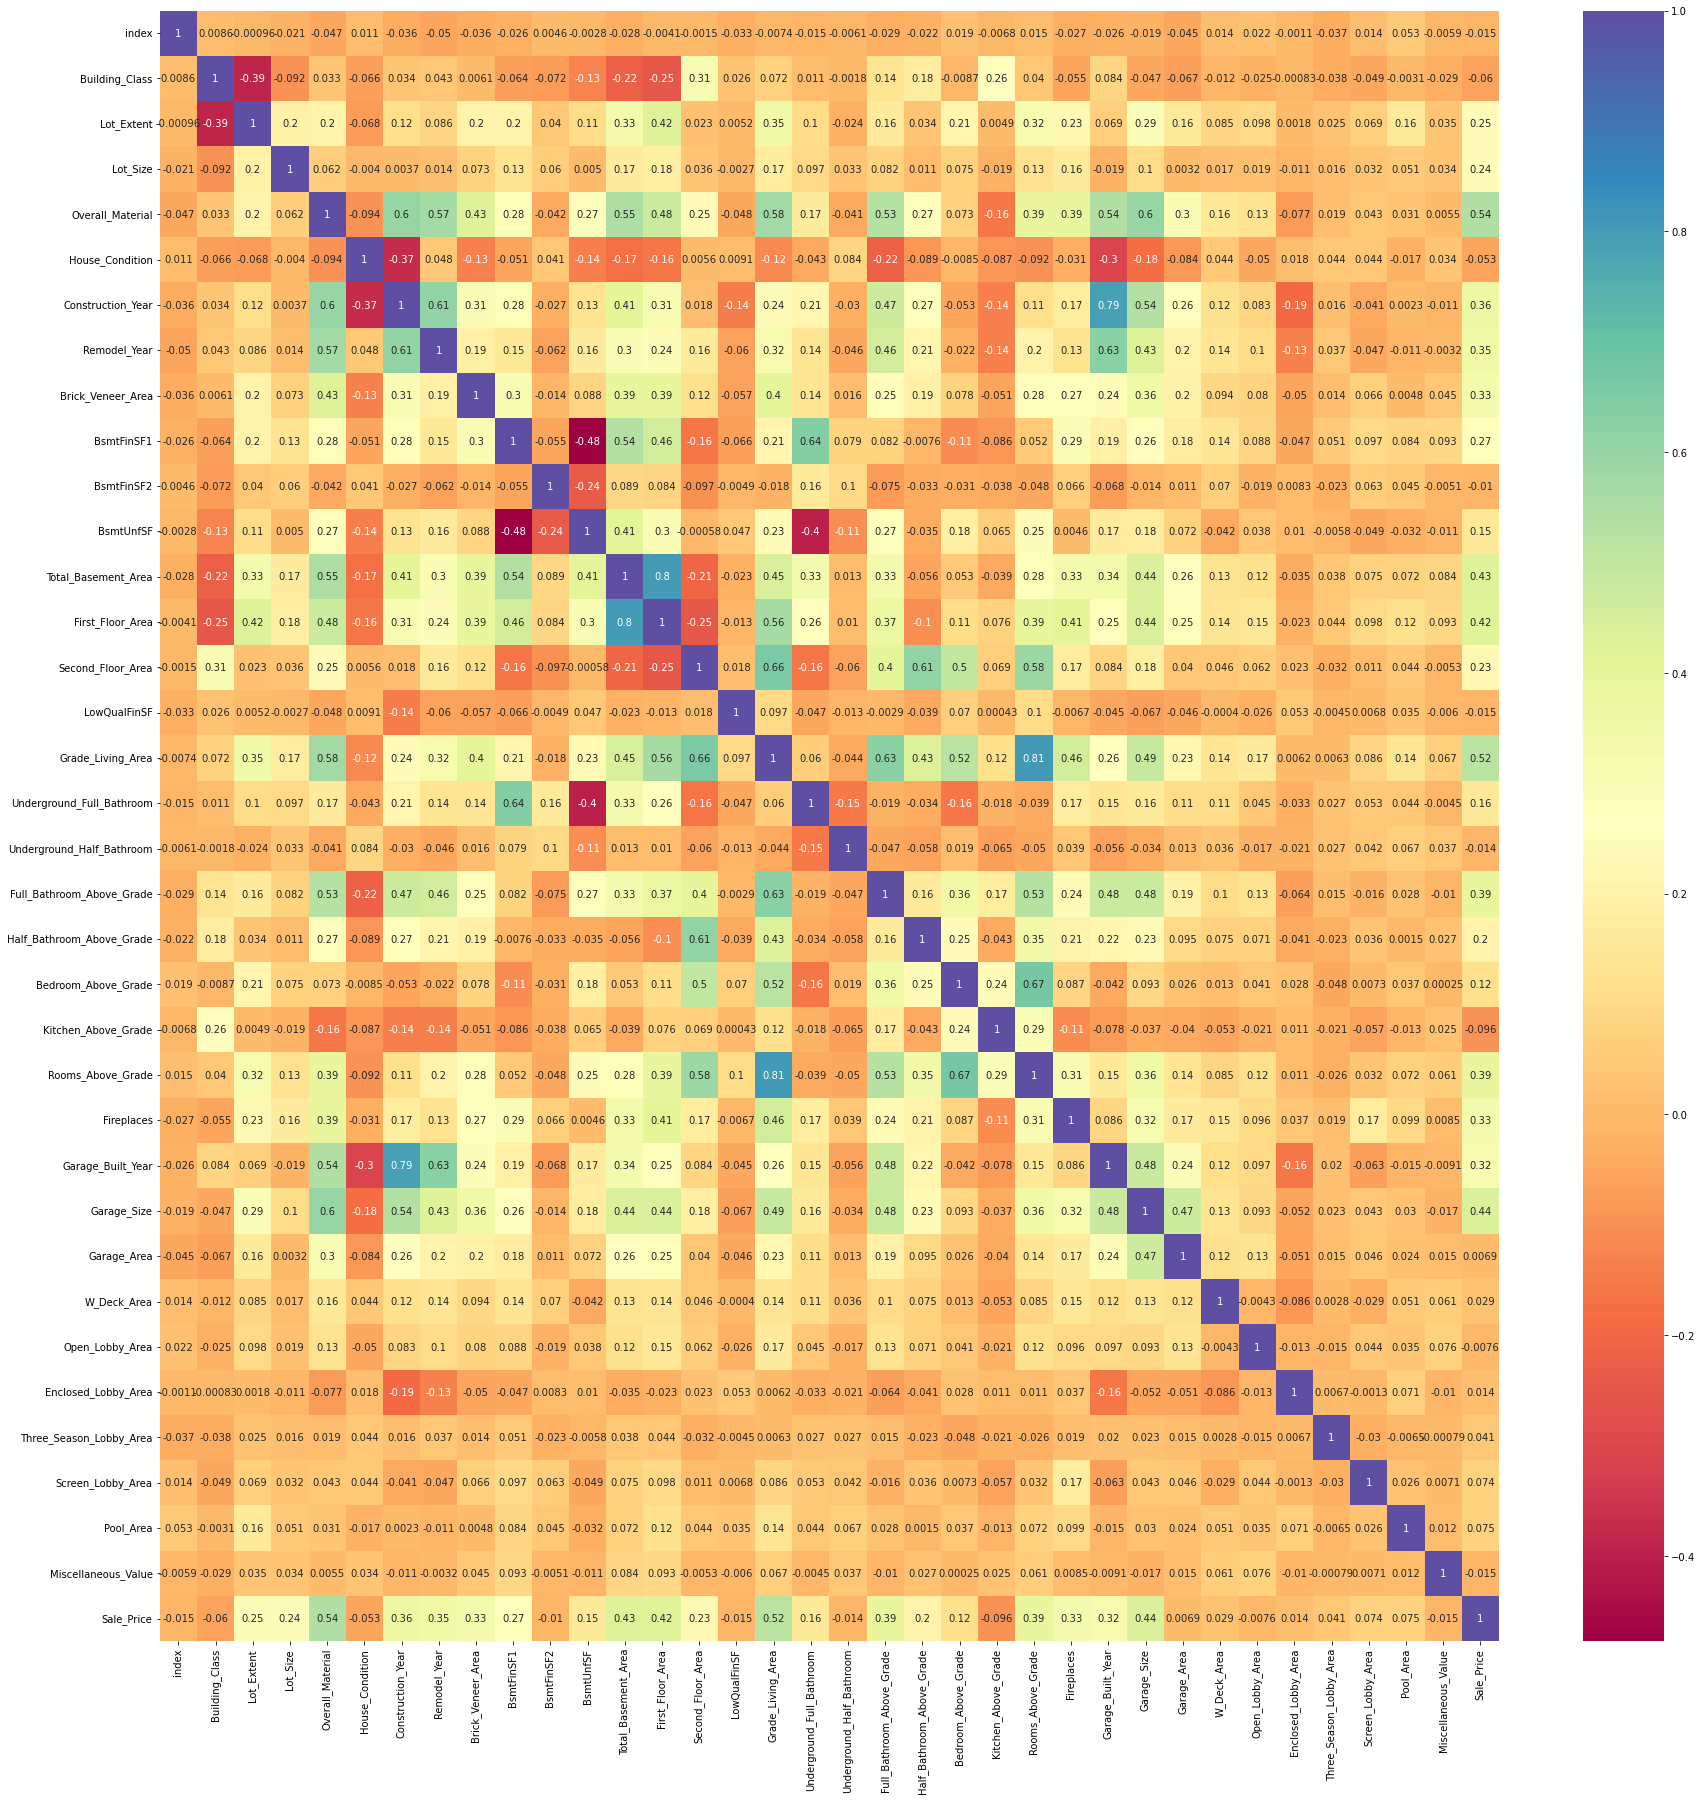

In [34]:
#calculating correlation among numeric variable 
corr_matrix = df_numeric_features.corr() 

#filter correlation values above 0.5
#filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(30,30))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);

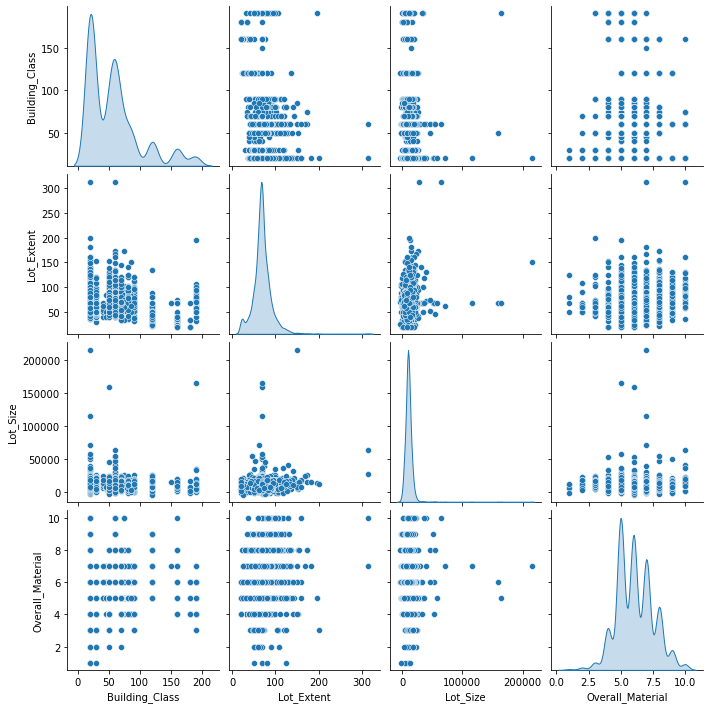

In [34]:

sns.pairplot(df_numeric_features.iloc[:,1:5], diag_kind="kde");plt.show()

In [35]:
#sns.set_palette("deep")

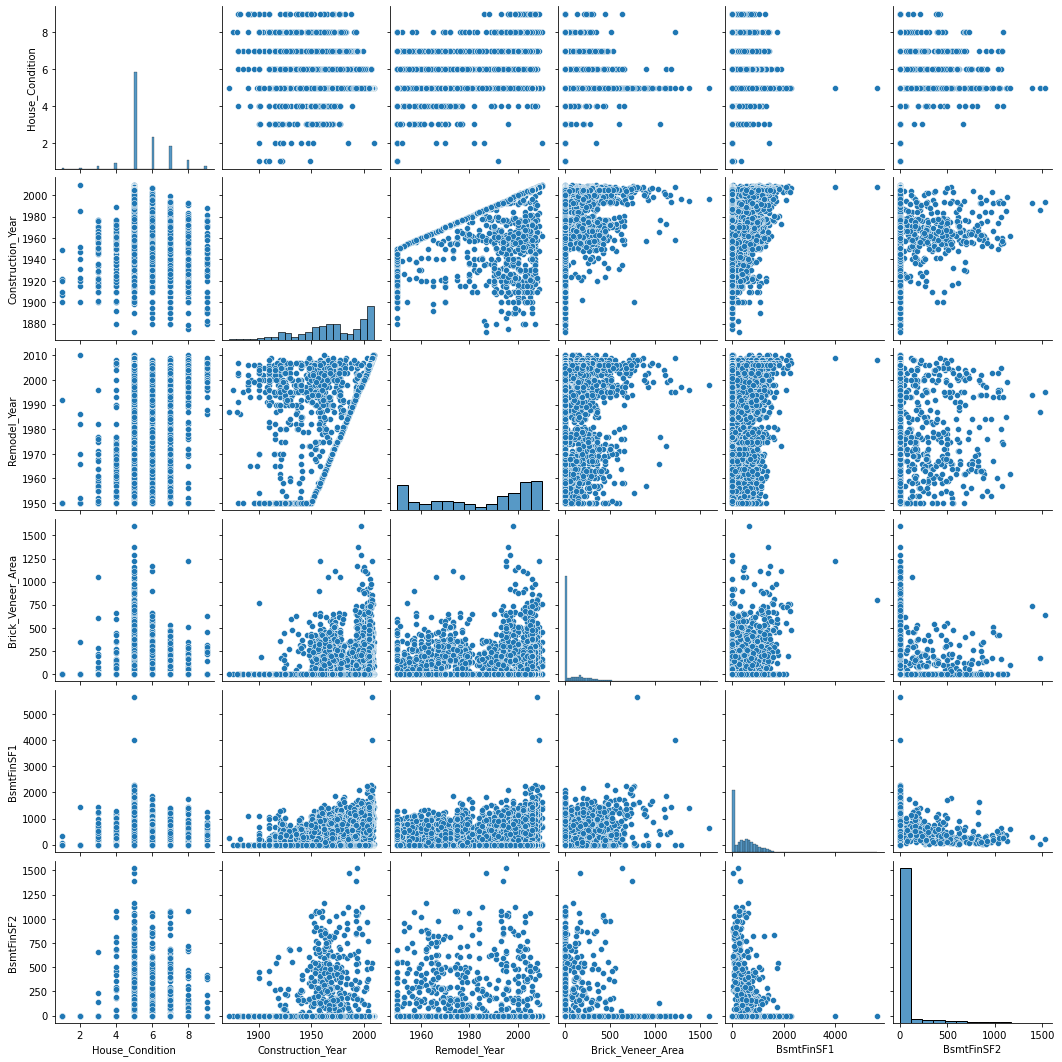

In [36]:
sns.pairplot(df_numeric_features.iloc[:,5:11], diag_kind="hist");plt.show()

In [37]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
calc_vif(df_numeric_features)

,variables,VIF
0,index,4.075840e+00
1,Building_Class,4.574117e+00
2,Lot_Extent,1.795086e+01
3,Lot_Size,3.003999e+00
4,Overall_Material,5.828695e+01
5,House_Condition,3.960664e+01
6,Construction_Year,1.809807e+04
7,Remodel_Year,1.607995e+04
8,Brick_Veneer_Area,1.867014e+00
9,BsmtFinSF1,4.983269e+04


In [35]:
df_categorical_features = alldata.select_dtypes(include=[np.object])

df_categorical_features.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [40]:
df_categorical_features.shape

(2918, 43)

In [41]:
df_categorical_features.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,...,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RLD,Paved,None,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RLD,Paved,None,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RLD,Paved,None,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RLD,Paved,None,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RLD,Paved,None,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


### Scale our numeric variables using min-max normalization

In [36]:
# apply the min-max scaling to our numeric variables
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# Scaling down the numeric variables
df_housingdata_numcols = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:38]),
columns = df_numeric_features.iloc[:,0:38].columns.tolist())

In [38]:
df_housingdata_numcols.describe()

,index,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Price
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,0.500000,0.218532,0.164679,0.065873,0.565494,0.570553,0.719673,0.571185,0.063394,0.078183,...,0.353393,0.371729,0.244710,0.253148,0.160790,0.005124,0.027896,0.002816,0.002991,0.190351
std,0.288923,0.250114,0.073018,0.035938,0.156672,0.139162,0.219539,0.348248,0.111797,0.080715,...,0.152301,0.132196,0.071651,0.073366,0.054679,0.049591,0.097558,0.044588,0.033382,0.079007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249829,0.000000,0.133562,0.051932,0.444444,0.500000,0.588768,0.250000,0.000000,0.000000,...,0.200000,0.279849,0.191879,0.201421,0.140046,0.000000,0.000000,0.000000,0.000000,0.177892
50%,0.500000,0.176471,0.160959,0.063164,0.555556,0.500000,0.731884,0.716667,0.000000,0.065202,...,0.400000,0.374911,0.234512,0.240166,0.140046,0.000000,0.000000,0.000000,0.000000,0.177892
75%,0.750171,0.294118,0.195205,0.075655,0.666667,0.625000,0.934783,0.900000,0.102344,0.129872,...,0.400000,0.446701,0.290160,0.294768,0.182810,0.000000,0.000000,0.000000,0.000000,0.177892
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Perform one-hot encoding on categorical variables

In [39]:
for col in  df_categorical_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_categorical_features[col],prefix=col)
    df_categorical_features = pd.concat([df_categorical_features,one_hot_encoded_variables],axis=1)
    df_categorical_features.drop([col],axis=1, inplace=True)

### Concatenate the numeric and encoded variables to the dataframe

In [40]:
df_housedata = pd.concat([df_housingdata_numcols,df_categorical_features], axis=1)

In [46]:
df_housedata.columns

Index(['index', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1',
       ...
       'Sale_Type_Oth', 'Sale_Type_WD', 'Sale_Condition_AbnoRMDl',
       'Sale_Condition_Abnorml', 'Sale_Condition_AdjLand',
       'Sale_Condition_Alloca', 'Sale_Condition_Family',
       'Sale_Condition_NoRMDal', 'Sale_Condition_Normal',
       'Sale_Condition_Partial'],
      dtype='object', length=319)

### Create training and testing datasets using the train_test_split

In [41]:
# create feature and response variable set
# we create train and test sample from our dataset
from sklearn.model_selection import train_test_split
# create feature and response varibles
X = df_housedata.drop(['Sale_Price'], axis=1)
Y = df_housedata ['Sale_Price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2042, 318) (876, 318) (2042,) (876,)


# USE OLS to create the model

In [42]:
from statsmodels.api import OLS

model_definition=OLS(y_train,x_train)

model_building=model_definition.fit()

model_building.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     11.04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          4.27e-233
Time:                        13:00:32   Log-Likelihood:                 3253.7
No. Observations:                2042   AIC:                            -5981.
Df Residuals:                    1779   BIC:                            -4503.
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
index                          0.0024      0.004      0.555      0.579      -0.006       0.011
Building_Class                -0.0063      0.026     -0.243      0.808      -0.057       0.044
Lot_Extent                     0.0465      0.025      1.835      0.067      -0.003       0.096
Lot_Size                       0.2868      0.041      6.934      0.000       0.206       0.368
Overall_Material               0.0501      0.018      2.849      0.004       0.016       0.085
House_Condition                0.0473      0.013      3.562      0.000       0.021       0.073
Construction_Year              0.0564      0.021      2.705      0.007       0.015       0.097
Remodel_Year                   0.0035      0.006      0.548      0.584      -0.009       0.016
Brick_Veneer_Area              0.0050      0.018      0.271      0.787      -0.031       0.041
BsmtFinSF1                    -0.7688      3.375     -0.228      0.820      -7.389       5.851
BsmtFinSF2                    -0.2275      0.913     -0.249      0.803      -2.018       1.564
BsmtUnfSF                     -0.3339      1.397     -0.239      0.811      -3.074       2.406
Total_Basement_Area            1.1370      3.651      0.311      0.756      -6.024       8.298
First_Floor_Area               0.0372      0.026      1.414      0.157      -0.014       0.089
Second_Floor_Area              0.1404      0.019      7.382      0.000       0.103       0.178
LowQualFinSF                   0.0071      0.035      0.203      0.839      -0.061       0.076
Grade_Living_Area              0.0894      0.023      3.968      0.000       0.045       0.134
Underground_Full_Bathroom     -0.0124      0.011     -1.143      0.253      -0.034       0.009
Underground_Half_Bathroom      0.0016      0.011      0.147      0.883      -0.020       0.023
Full_Bathroom_Above_Grade      0.0084      0.016      0.522      0.602      -0.023       0.040
Half_Bathroom_Above_Grade     -0.0071      0.008     -0.918      0.359      -0.022       0.008
Bedroom_Above_Grade           -0.1019      0.021     -4.918      0.000      -0.143      -0.061
Kitchen_Above_Grade           -0.0690      0.036     -1.932      0.054      -0.139       0.001
Rooms_Above_Grade              0.0617      0.023      2.690      0.007       0.017       0.107
Fireplaces                    -0.0074      0.020     -0.361      0.718      -0.047       0.033
Garage_Built_Year             -0.0101      0.033     -0.307      0.759      -0.074       0.054
Garage_Size                    0.0421      0.016      2.591      0.010       0.010       0.074
Garage_Area                   -0.1406      0.011    -12.851      0.000      -0.162      -0.119
W_Deck_Area                   -0.1090      0.018     -5.998      0.000      -0.145      -0.073
Open_Lobby_Area               -0.1060      

### Use SGDRegressor() to build a linear model

In [43]:
import numpy as np
from sklearn.linear_model import SGDRegressor
lin_model = SGDRegressor()
# we fit our model with train data
lin_model.fit(x_train, y_train)
# we use predict() to predict our values
lin_model_predictions = lin_model.predict(x_test)
# we check the coefficient of determination with score()
print(lin_model.score(x_test,y_test))

0.3965223804342981


In [44]:
?lin_model

coefficient of determination tells about the goodness of fit of a model

In [50]:
print(lin_model.intercept_)

[0.009034]


In [51]:
print(lin_model.coef_)

[ 6.39598097e-06 -1.29751122e-03  5.77903927e-03  7.47718300e-03
  1.89277481e-02  9.49786819e-03  4.98265450e-03  6.27416870e-03
  6.96553112e-03  5.04157758e-03  1.70701894e-03  9.92237142e-03
  8.88608675e-03  1.09424287e-02  1.59699077e-02  1.40156554e-03
  1.63085961e-02  4.94547402e-03 -1.61543283e-03  1.38251864e-02
  4.37119432e-03  6.67710327e-03  3.02528207e-03  1.90571024e-02
  8.60897484e-03  2.10747323e-03  1.46767593e-02 -2.21094513e-02
 -4.34966050e-03 -6.67658081e-03  5.49892300e-03  2.85868292e-03
  5.08476793e-03  4.46503226e-03 -7.99360706e-04 -1.40160013e-03
  2.54988384e-03  6.43217497e-04 -5.03068381e-04  1.38750330e-02
 -6.14261985e-03  7.48344231e-04  8.27250172e-03  1.15506151e-03
  6.19479628e-03  1.67098815e-03 -3.25811982e-03  1.31289022e-02
 -1.18877158e-03  3.38835117e-04 -1.56923034e-03 -1.71076178e-03
  5.65842440e-03  6.64241366e-03  9.02084595e-03  0.00000000e+00
  0.00000000e+00 -5.50206606e-04  1.12695845e-02 -9.59426546e-04
 -5.79634473e-04 -1.59470

### Mean Square Error

In [52]:
# we check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lin_model_predictions)
rmse = np.sqrt(mse)
print(rmse)

0.06051958632027029


RMSE is 0.067 means the total loss(squareroot of the difference between the actual value and the predicted value)
The smaller the RMSE value, the better the model

In [53]:
alldata['Sale_Price'].min()

34900.0

In [54]:
Sale_price_Range=alldata['Sale_Price'].max()-alldata['Sale_Price'].min()

Sale_price_Range

720100.0

# Predictions on test data

In [55]:
pred_test = lin_model.predict(x_test);pred_test

array([0.12615864, 0.10791058, 0.1916232 , 0.11605146, 0.18724667,
       0.13925561, 0.15341149, 0.11548492, 0.17043024, 0.11323316,
       0.13421865, 0.1526076 , 0.17855906, 0.14484334, 0.32024591,
       0.15448905, 0.15814966, 0.15109965, 0.13554741, 0.17117449,
       0.27153874, 0.194565  , 0.14014604, 0.13143852, 0.14184989,
       0.15716816, 0.14512848, 0.16175048, 0.21418281, 0.16835895,
       0.18466209, 0.18851685, 0.17134847, 0.18207487, 0.17160584,
       0.16299915, 0.18269599, 0.18076381, 0.11005818, 0.13709979,
       0.19014153, 0.16010391, 0.29188345, 0.15776963, 0.11567591,
       0.19726151, 0.13030669, 0.14833127, 0.16884533, 0.15848322,
       0.13520493, 0.09945772, 0.14976656, 0.14829068, 0.29554493,
       0.25412765, 0.10450263, 0.1792289 , 0.21792975, 0.25697861,
       0.22339095, 0.23105234, 0.15110843, 0.19804506, 0.14226401,
       0.17063027, 0.14275171, 0.17122507, 0.13258192, 0.21190284,
       0.1397746 , 0.18955162, 0.16175492, 0.17292588, 0.20005

# Mean Square Error

In [56]:
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
print(rmse)

0.06051958632027029


From the above result we can see that mean square error is 0.074. 
for better result we should choose a lesser MSE rather than greater MSE

# Scaling the Sales Price  back to the normal range

In [57]:
(pred_test*Sale_price_Range)+alldata['Sale_Price'].min()

array([125746.83832925, 112606.40537843, 172887.868107  , 118468.65891369,
       169736.32662924, 135177.96782015, 145371.61098988, 118060.68792579,
       157626.81919988, 116439.19817282, 131550.84996436, 144792.73575783,
       163480.37888355, 139201.68921629, 265509.08123064, 146147.56152624,
       148783.57100878, 143706.85990744, 132507.69183221, 158162.75206416,
       230435.04912553, 175006.25463046, 135819.16391185, 129548.87859149,
       137046.10847557, 148076.79053835, 139407.0184563 , 151376.51767452,
       189133.04213131, 156135.27976232, 167875.17178173, 170650.98389878,
       158288.03023347, 166012.11637078, 158473.36772376, 152275.68496397,
       166459.3820012 , 165068.01932908, 114152.89706625, 133625.55879294,
       171820.91590625, 150190.82329602, 245085.27200177, 148509.91279257,
       118198.22553492, 176948.01188014, 128733.8481086 , 141713.35045583,
       156485.52461714, 149023.76482552, 132261.07308245, 106519.5064131 ,
       142746.89886542, 1